# Breast Cancer Classification using SVM

## Introduction

Breast cancer is one of the most common cancers among women worldwide. Early detection is crucial for effective treatment and improved survival rates. The goal of this notebook is to analyze the **Breast Cancer Wisconsin (Diagnostic) Dataset** and classify tumors as **malignant (cancerous)** or **benign (non-cancerous)** using **Support Vector Machines (SVMs)**.

We will explore multiple SVM kernels, including:
- **Linear kernel** – effective for linearly separable data.
- **RBF kernel** – captures non-linear relationships.
- **Polynomial kernel** – allows modeling of higher-order feature interactions.

The notebook will cover:
1. Data loading and preprocessing.
2. Training baseline SVM models.
3. Visualization of decision boundaries.
4. Cross-validation and hyperparameter tuning.
5. Comparison of baseline vs tuned models with plots.
6. Saving models and final summary.

**Key concepts you will learn:**
- Margin maximization in SVMs
- Kernel trick for non-linear data
- Hyperparameter tuning (C, gamma, degree)
- Cross-validation for model selection
- Model evaluation using accuracy, confusion matrix, and ROC curves


## Section 1: Data Loading & Preprocessing

### Imports
In this first step, we import all the necessary Python packages for data handling, preprocessing, modeling, visualization, and dimensionality reduction.

- `numpy` and `pandas` are used for numerical computations and data manipulation.
- `matplotlib.pyplot` is used for plotting graphs and visualizations.
- `train_test_split` is used to split the dataset into training and testing sets.
- `GridSearchCV` and `StratifiedKFold` are used for hyperparameter tuning and cross-validation.
- `StandardScaler` is available if further standardization is needed.
- `PCA` from `sklearn.decomposition` is used for dimensionality reduction and 2D visualization.
- `SVC` from `sklearn.svm` is used to create Support Vector Machine classifiers.
- `accuracy_score`, `classification_report`, `confusion_matrix`, `ConfusionMatrixDisplay`, and `RocCurveDisplay` are used for model evaluation.
- `joblib` is used to save and load trained models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import joblib

### Load Dataset
Here, we load the cleaned and preprocessed breast cancer dataset from a CSV file. 

- The dataset contains features computed from digitized images of breast mass cell nuclei.
- The target variable `diagnosis` indicates whether a tumor is malignant (`1`) or benign (`0`).
- We ensure that `diagnosis` is of integer type for modeling.
- We also display the shape and a preview of the dataset to verify successful loading.


In [2]:
df = pd.read_csv("datasets/data-clean.csv")
df['diagnosis'] = df['diagnosis'].astype(int)
print("Shape of dataset:", df.shape)

df.head()

Shape of dataset: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Train/Test Split
In this step, we split the dataset into training and testing sets.

- Features (`X`) are all columns except `diagnosis`.
- Labels (`y`) are the `diagnosis` column.
- We use an 80/20 split for training and testing.
- `stratify=y` ensures that both training and test sets maintain the same class distribution.
- Random state is set for reproducibility.


In [3]:
X = df.drop(columns=["diagnosis"]).values
y = df["diagnosis"].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Train samples: 455
Test samples: 114


---

## Section 2: Baseline SVM Models

### Linear SVM
We start by training a **Linear SVM** on the training set. 

- Linear kernel is suitable for linearly separable data.
- We compute predictions on both training and test sets.
- Metrics displayed include:
  - Training accuracy
  - Confusion matrix
  - Classification report (precision, recall, f1-score)


In [4]:
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_linear.fit(X_train, y_train)

y_train_pred = svc_linear.predict(X_train)
y_test_pred_linear = svc_linear.predict(X_test)

print("Linear SVM - Training accuracy:", accuracy_score(y_train, y_train_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

Linear SVM - Training accuracy: 0.989010989010989

Confusion Matrix:
[[285   0]
 [  5 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.97      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



### RBF SVM
Next, we train an **RBF (Radial Basis Function) SVM**.

- RBF kernel can capture non-linear patterns in the data.
- Predictions are made on the training and test sets.
- Training performance is evaluated using:
  - Accuracy
  - Confusion matrix
  - Classification report


In [5]:
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svc_rbf.fit(X_train, y_train)

y_train_pred_rbf = svc_rbf.predict(X_train)
y_test_pred_rbf = svc_rbf.predict(X_test)

print("RBF SVM - Training accuracy:", accuracy_score(y_train, y_train_pred_rbf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rbf))

print("\nClassification Report:")
print(classification_report(y_train, y_train_pred_rbf))

RBF SVM - Training accuracy: 0.9868131868131869

Confusion Matrix:
[[285   0]
 [  6 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.96      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



### Polynomial SVM (degree=3)
Finally, we train a **Polynomial SVM** with degree 3.

- Polynomial kernel maps features into higher-dimensional space.
- Predictions are made on training and test sets.
- Training performance is evaluated using:
  - Accuracy
  - Confusion matrix
  - Classification report


In [6]:
svc_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svc_poly.fit(X_train, y_train)

y_train_pred_poly = svc_poly.predict(X_train)
y_test_pred_poly = svc_poly.predict(X_test)

print("Polynomial SVM (deg=3) - Training accuracy:", accuracy_score(y_train, y_train_pred_poly))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_poly))

print("\nClassification Report:")
print(classification_report(y_train, y_train_pred_poly))

Polynomial SVM (deg=3) - Training accuracy: 0.9120879120879121

Confusion Matrix:
[[285   0]
 [ 40 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       285
           1       1.00      0.76      0.87       170

    accuracy                           0.91       455
   macro avg       0.94      0.88      0.90       455
weighted avg       0.92      0.91      0.91       455



### Compare Training Accuracies
Here we compare the **training accuracies** of all three baseline SVM models.

- Linear, RBF, and Polynomial kernels are evaluated side by side.
- This provides a quick overview of which kernel fits the training data better.


In [7]:
print("Linear SVM accuracy:", accuracy_score(y_train, svc_linear.predict(X_train)))
print("RBF SVM accuracy:", accuracy_score(y_train, svc_rbf.predict(X_train)))
print("Polynomial SVM (deg=3) accuracy:", accuracy_score(y_train, svc_poly.predict(X_train)))


Linear SVM accuracy: 0.989010989010989
RBF SVM accuracy: 0.9868131868131869
Polynomial SVM (deg=3) accuracy: 0.9120879120879121


---

## Section 3: Decision Boundary Visualization

### PCA Projection to 2D
To visualize SVM decision boundaries, we reduce the feature space to 2 dimensions using **Principal Component Analysis (PCA)**.

- PCA projects high-dimensional data into 2D while retaining maximum variance.
- This allows us to plot decision boundaries for each kernel.
- We transform both training and test sets for consistency.


In [8]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape after PCA:", X_train_pca.shape)


Shape after PCA: (455, 2)


### Train SVMs on 2D PCA Features
We train the SVM models on the **2D PCA-transformed data** to enable visualization.

- Linear, RBF, and Polynomial (degree=3) kernels are trained.
- Probability estimation is disabled since we only need class predictions for plotting.
- These models are used solely for plotting decision boundaries, not for final evaluation.


In [9]:
svc_linear_2d = SVC(kernel='linear', probability=False, random_state=42).fit(X_train_pca, y_train)
svc_rbf_2d = SVC(kernel='rbf', probability=False, random_state=42).fit(X_train_pca, y_train)
svc_poly_2d = SVC(kernel='poly', degree=3, probability=False, random_state=42).fit(X_train_pca, y_train)


### Plotting Function for Decision Boundaries
We define a function to **plot the decision boundaries** of a classifier on 2D data.

- The function creates a mesh grid over the 2D PCA space.
- It colors regions according to predicted class labels.
- Training points are overlaid for reference.
- The plot is also saved to the `plots/` directory for documentation.


In [10]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", name=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.savefig(f"plots/{title}.png")
    plt.show()

### Visualize Decision Boundaries
We visualize the **decision boundaries** for all three SVM kernels on the PCA-2D data.

- Linear, RBF, and Polynomial (deg=3) SVMs are plotted.
- This provides an intuitive understanding of how each kernel separates classes.
- Regions of different colors represent predicted classes, and points show training data.


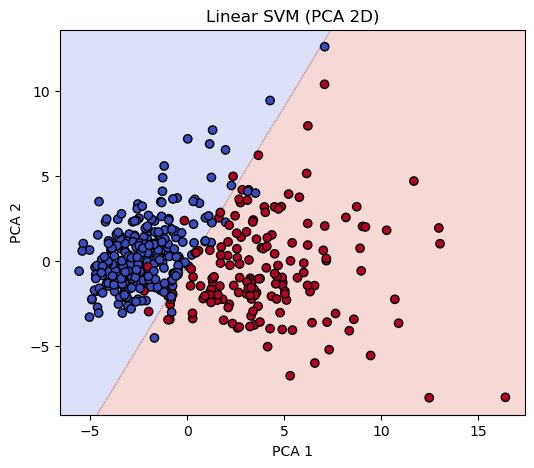

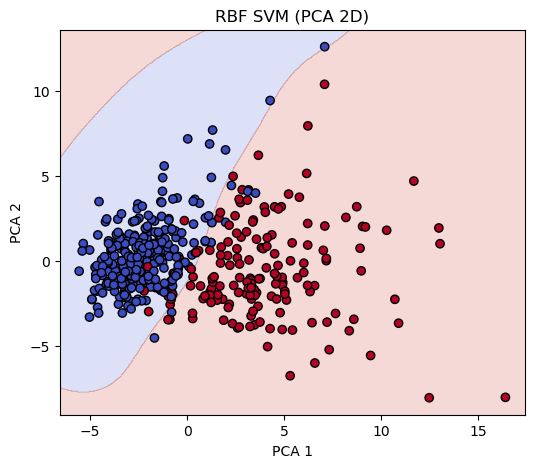

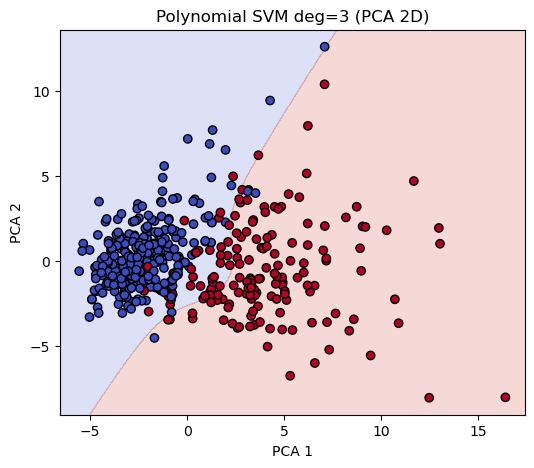

In [11]:
plot_decision_boundary(svc_linear_2d, X_train_pca, y_train,  "Linear SVM (PCA 2D)")
plot_decision_boundary(svc_rbf_2d, X_train_pca, y_train, "RBF SVM (PCA 2D)")
plot_decision_boundary(svc_poly_2d, X_train_pca, y_train, "Polynomial SVM deg=3 (PCA 2D)")


---

## Section 4: Hyperparameter Tuning of SVMs

### Hyperparameter Tuning for Linear SVM
We perform **GridSearchCV** to find the optimal `C` parameter for the Linear SVM.

- 5-fold stratified cross-validation is used.
- The best model is selected based on **accuracy**.
- This helps prevent overfitting and selects a model that generalizes well.


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}

grid_linear = GridSearchCV(
    estimator=SVC(kernel='linear', probability=True, random_state=42),
    param_grid=param_grid_linear,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_linear.fit(X_train, y_train)

best_linear = grid_linear.best_estimator_

print("Best parameters (Linear SVM):", grid_linear.best_params_)
print("Best CV accuracy (Linear SVM):", grid_linear.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters (Linear SVM): {'C': 0.1}
Best CV accuracy (Linear SVM): 0.9670329670329669


### Evaluate Tuned Linear SVM
We evaluate the tuned Linear SVM on the **test set**.

- Predictions are made using the best Linear SVM found in GridSearchCV.
- Metrics reported:
  - Test accuracy
  - Confusion matrix
  - Classification report
- This allows us to compare the tuned model against the baseline Linear SVM.


In [13]:
y_test_pred_linear_tuned = best_linear.predict(X_test)

print("Tuned Linear SVM - Test Accuracy:", accuracy_score(y_test, y_test_pred_linear_tuned))
print("\nConfusion Matrix (Tuned Linear):")
print(confusion_matrix(y_test, y_test_pred_linear_tuned))
print("\nClassification Report (Tuned Linear):")
print(classification_report(y_test, y_test_pred_linear_tuned))

Tuned Linear SVM - Test Accuracy: 0.9824561403508771

Confusion Matrix (Tuned Linear):
[[72  0]
 [ 2 40]]

Classification Report (Tuned Linear):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Hyperparameter Tuning for RBF SVM
We perform **GridSearchCV** for the RBF SVM to find the best combination of `C` and `gamma`.

- 5-fold stratified cross-validation ensures stable performance.
- The RBF kernel can capture non-linear patterns, so tuning `gamma` is critical.
- The best model is selected based on accuracy.


In [14]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

grid_rbf = GridSearchCV(
    estimator=SVC(kernel='rbf', probability=True, random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rbf.fit(X_train, y_train)
print("Best parameters (RBF):", grid_rbf.best_params_)
print("Best CV accuracy (RBF):", grid_rbf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters (RBF): {'C': 10, 'gamma': 0.01}
Best CV accuracy (RBF): 0.9780219780219781


### Evaluate Tuned RBF SVM
We evaluate the tuned RBF SVM on the **test set**.

- Predictions are made using the best RBF SVM from GridSearchCV.
- Metrics reported include test accuracy, confusion matrix, and classification report.
- This allows comparison with the baseline RBF SVM.


In [15]:
best_rbf = grid_rbf.best_estimator_
y_test_pred_rbf_tuned = best_rbf.predict(X_test)

print("Tuned RBF SVM - Test Accuracy:", accuracy_score(y_test, y_test_pred_rbf_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rbf_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rbf_tuned))

Tuned RBF SVM - Test Accuracy: 0.9824561403508771

Confusion Matrix:
[[72  0]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Hyperparameter Tuning for Polynomial SVM (degree=3)
We perform **GridSearchCV** for the Polynomial SVM (degree=3) to tune `C` and `gamma`.

- Polynomial kernel allows modeling higher-order feature interactions.
- 5-fold stratified cross-validation ensures robust hyperparameter selection.
- The best model is selected based on accuracy.


In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_poly = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

grid_poly = GridSearchCV(
    estimator=SVC(kernel='poly', degree=3, probability=True, random_state=42),
    param_grid=param_grid_poly,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_poly.fit(X_train, y_train)

print("Best parameters (Polynomial SVM):", grid_poly.best_params_)
print("Best CV accuracy (Polynomial SVM):", grid_poly.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters (Polynomial SVM): {'C': 100, 'gamma': 'scale'}
Best CV accuracy (Polynomial SVM): 0.956043956043956


### Evaluate Tuned Polynomial SVM
We evaluate the tuned Polynomial SVM on the **test set**.

- Predictions are made using the best Polynomial SVM from GridSearchCV.
- Metrics include test accuracy, confusion matrix, and classification report.
- This helps assess the performance improvement after tuning compared to the baseline.


In [17]:
best_poly = grid_poly.best_estimator_
y_test_pred_poly_tuned = best_poly.predict(X_test)

print("Tuned Polynomial SVM - Test Accuracy:", accuracy_score(y_test, y_test_pred_poly_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_poly_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_poly_tuned))

Tuned Polynomial SVM - Test Accuracy: 0.9385964912280702

Confusion Matrix:
[[72  0]
 [ 7 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



---

## Section 5: Baseline vs Tuned Model Comparison

### Accuracy Comparison
We compare the **test set accuracies** of baseline and tuned SVM models across all kernels.

- Linear, RBF, and Polynomial SVMs are evaluated side by side.
- Baseline models are plotted in **blue**, tuned models in **red**.
- This line plot provides a quick overview of the impact of hyperparameter tuning on model performance.


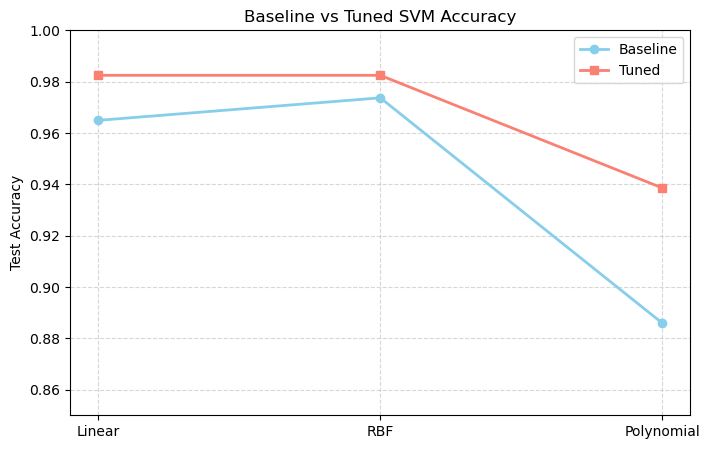

In [18]:
models = ['Linear', 'RBF', 'Polynomial']
baseline_acc = [
    accuracy_score(y_test, y_test_pred_linear),
    accuracy_score(y_test, y_test_pred_rbf),
    accuracy_score(y_test, y_test_pred_poly)
]
tuned_acc = [
    accuracy_score(y_test, y_test_pred_linear_tuned),
    accuracy_score(y_test, y_test_pred_rbf_tuned),
    accuracy_score(y_test, y_test_pred_poly_tuned)
]

plt.figure(figsize=(8,5))
plt.plot(models, baseline_acc, marker='o', color='skyblue', linewidth=2, label='Baseline')
plt.plot(models, tuned_acc, marker='s', color='salmon', linewidth=2, label='Tuned')
plt.ylim(0.85,1)
plt.ylabel("Test Accuracy")
plt.title("Baseline vs Tuned SVM Accuracy")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig("plots/Baseline vs Tuned SVM Accuracy.png")
plt.show()

### Confusion Matrices
We visualize the **confusion matrices** for both baseline and tuned models.

- Each row corresponds to a kernel: Linear, RBF, Polynomial.
- Left column shows baseline, right column shows tuned.
- Blue heatmaps represent baseline performance, red heatmaps represent tuned performance.
- Confusion matrices help us understand model performance per class.


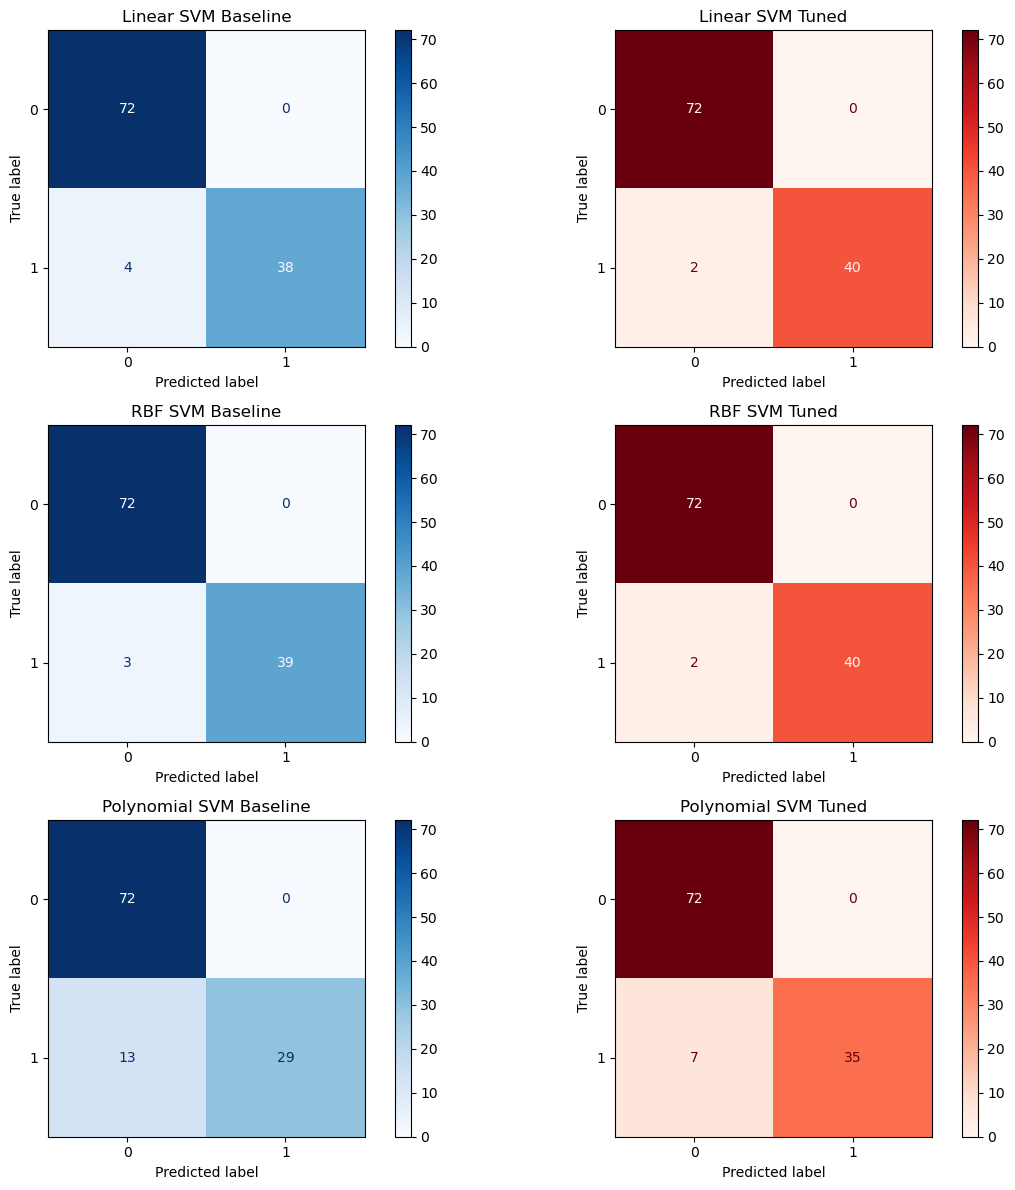

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(12,12))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_linear, ax=axs[0,0], cmap='Blues')
axs[0,0].set_title("Linear SVM Baseline")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_linear_tuned, ax=axs[0,1], cmap='Reds')
axs[0,1].set_title("Linear SVM Tuned")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rbf, ax=axs[1,0], cmap='Blues')
axs[1,0].set_title("RBF SVM Baseline")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rbf_tuned, ax=axs[1,1], cmap='Reds')
axs[1,1].set_title("RBF SVM Tuned")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_poly, ax=axs[2,0], cmap='Blues')
axs[2,0].set_title("Polynomial SVM Baseline")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_poly_tuned, ax=axs[2,1], cmap='Reds')
axs[2,1].set_title("Polynomial SVM Tuned")

plt.tight_layout()
plt.savefig("plots/Baseline vs Tuned Heatmap.png")
plt.show()

### ROC Curves
We plot the **ROC curves** for all SVM models on the test set.

- Each subplot corresponds to a different kernel.
- Baseline ROC curves are shown in default color, tuned ROC curves are overlaid for comparison.
- The ROC curve illustrates the trade-off between true positive rate and false positive rate.
- A higher area under the curve (AUC) indicates better model performance.


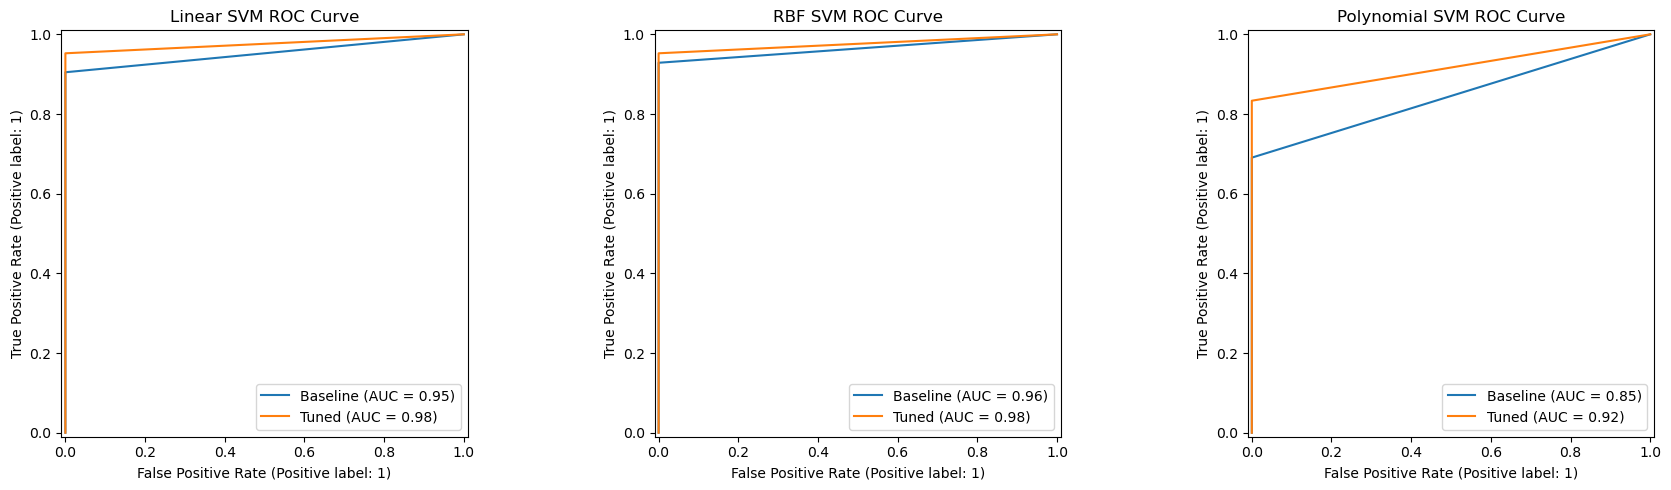

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

RocCurveDisplay.from_predictions(y_test, y_test_pred_linear, ax=axs[0], name='Baseline')
RocCurveDisplay.from_predictions(y_test, y_test_pred_linear_tuned, ax=axs[0], name='Tuned')
axs[0].set_title("Linear SVM ROC Curve")

RocCurveDisplay.from_predictions(y_test, y_test_pred_rbf, ax=axs[1], name='Baseline')
RocCurveDisplay.from_predictions(y_test, y_test_pred_rbf_tuned, ax=axs[1], name='Tuned')
axs[1].set_title("RBF SVM ROC Curve")

RocCurveDisplay.from_predictions(y_test, y_test_pred_poly, ax=axs[2], name='Baseline')
RocCurveDisplay.from_predictions(y_test, y_test_pred_poly_tuned, ax=axs[2], name='Tuned')
axs[2].set_title("Polynomial SVM ROC Curve")

plt.tight_layout()
plt.savefig("plots/SVM ROC Curves.png")
plt.show()


---

## Section 6: Model Saving & Summary

### Save Trained Models
We save all trained SVM models (baseline and tuned) using **joblib**.

- Linear, RBF, and Polynomial SVMs are saved separately for both baseline and tuned versions.
- This allows us to **reuse the trained models** later without retraining.
- Saved models are stored in the `models/` directory with descriptive filenames.


In [21]:
joblib.dump(svc_linear, "models/linear_svm_baseline.pkl")
print("Linear SVM baseline saved!")

joblib.dump(svc_rbf, "models/linear_svm_tuned.pkl")
print("Linear SVM tuned saved!")

joblib.dump(svc_rbf, "models/rbf_svm_baseline.pkl")
print("RBF SVM baseline saved!")

joblib.dump(best_rbf, "models/rbf_svm_tuned.pkl")
print("RBF SVM tuned saved!")

joblib.dump(svc_poly, "models/poly_svm_baseline.pkl")
print("Polynomial SVM baseline saved!")

joblib.dump(best_poly, "models/poly_svm_tuned.pkl")
print("Polynomial SVM tuned saved!")

Linear SVM baseline saved!
Linear SVM tuned saved!
RBF SVM baseline saved!
RBF SVM tuned saved!
Polynomial SVM baseline saved!
Polynomial SVM tuned saved!


### Test Set Summary
We summarize the **test set accuracies** of all models (baseline and tuned).

- Linear, RBF, and Polynomial SVMs are compared.
- This provides a final overview of which models performed best after tuning.
- It also helps in selecting the **best-performing model** for deployment or further analysis.


In [22]:
print("Linear SVM baseline test accuracy:", accuracy_score(y_test, y_test_pred_linear))
print("Linear SVM tuned test accuracy:", accuracy_score(y_test, y_test_pred_linear_tuned))

print("RBF SVM baseline test accuracy:", accuracy_score(y_test, y_test_pred_rbf))
print("RBF SVM tuned test accuracy:", accuracy_score(y_test, y_test_pred_rbf_tuned))  # or y_test_pred_rbf_tuned if separate

print("Polynomial SVM baseline test accuracy:", accuracy_score(y_test, y_test_pred_poly))
print("Polynomial SVM tuned test accuracy:", accuracy_score(y_test, y_test_pred_poly_tuned))

Linear SVM baseline test accuracy: 0.9649122807017544
Linear SVM tuned test accuracy: 0.9824561403508771
RBF SVM baseline test accuracy: 0.9736842105263158
RBF SVM tuned test accuracy: 0.9824561403508771
Polynomial SVM baseline test accuracy: 0.8859649122807017
Polynomial SVM tuned test accuracy: 0.9385964912280702


---

## Conclusion
- Linear SVM performs well on this dataset; simple and effective for linearly separable data. Both baseline and tuned models were evaluated.
- RBF SVM captures non-linear patterns and achieves higher accuracy after hyperparameter tuning.
- Polynomial kernel shows oscillating performance with degree; degree=1 behaves like linear, but tuning improves performance.
- Best performing models: Tuned RBF SVM, Tuned Linear SVM, and Tuned Polynomial SVM, depending on CV results.
- Cross-validation ensures stable performance and helps prevent overfitting.

------